In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
data = pd.read_csv('AnscombeQuartet.txt', sep='\t', header=None)
data.head()

,0,1,2,3,4,5,6,7
0,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
1,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
2,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71
3,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84
4,11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47


In [3]:
header = pd.MultiIndex.from_product([['Dataset 1','Dataset 2', 'Dataset 3', 'Dataset 4'],
                                     ['x', 'y']],
                                    names=['dat','val'])
data.columns = header
data.index = [1,2,3,4,5,6,7,8,9,10,11]
data.head()

dat Dataset 1       Dataset 2       Dataset 3        Dataset 4      
val         x     y         x     y         x      y         x     y
1        10.0  8.04      10.0  9.14      10.0   7.46       8.0  6.58
2         8.0  6.95       8.0  8.14       8.0   6.77       8.0  5.76
3        13.0  7.58      13.0  8.74      13.0  12.74       8.0  7.71
4         9.0  8.81       9.0  8.77       9.0   7.11       8.0  8.84
5        11.0  8.33      11.0  9.26      11.0   7.81       8.0  8.47

In [4]:
#data.to_latex('hola.tex')

In [5]:
data.columns = ['$x_1$','$y_1$','$x_2$','$y_2$','$x_3$','$y_3$','$x_4$','$y_4$']
data.head()

,$x_1$,$y_1$,$x_2$,$y_2$,$x_3$,$y_3$,$x_4$,$y_4$
1,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
2,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
3,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71
4,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84
5,11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47


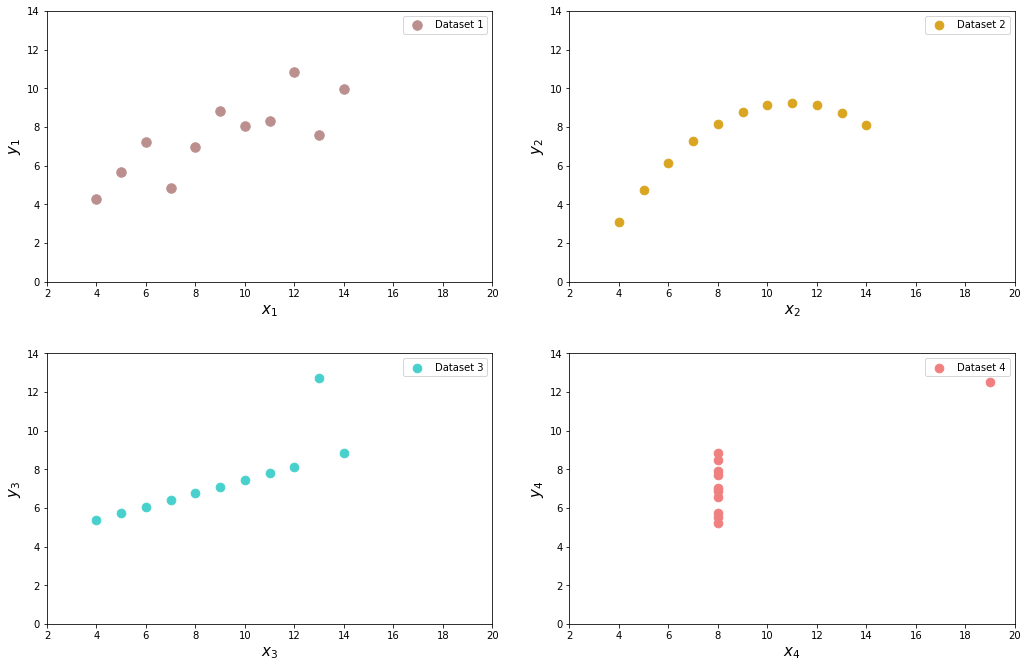

In [6]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))

parametros1 = {'marker':'o', 'c':'rosybrown','s':90, 'xlim':[2,20], 'ylim':[0,14]}
data.plot.scatter('$x_1$','$y_1$', label='Dataset 1', ax=axes[0,0], **parametros1)

parametros2 = {'marker':'o', 'c':'goldenrod', 's':75, 'xlim':[2,20], 'ylim':[0,14]}
data.plot.scatter('$x_2$','$y_2$', label='Dataset 2', ax=axes[0,1], **parametros2)

parametros3 = {'marker':'o', 'c':'mediumturquoise',  's':75, 'xlim':[2,20], 'ylim':[0,14]}
data.plot.scatter('$x_3$','$y_3$', label='Dataset 3', ax=axes[1,0], **parametros3)

parametros4 = {'marker':'o', 'c':'lightcoral',  's':75, 'xlim':[2,20], 'ylim':[0,14]}
data.plot.scatter('$x_4$','$y_4$', label='Dataset 4', ax=axes[1,1], **parametros4)

plt.tight_layout(pad=3.5)

axes[0,0].set_xlabel('$x_1$',fontsize=15)
axes[0,0].set_ylabel('$y_1$',fontsize=15)
axes[0,1].set_xlabel('$x_2$',fontsize=15)
axes[0,1].set_ylabel('$y_2$',fontsize=15)
axes[1,1].set_xlabel('$x_4$',fontsize=15)
axes[1,1].set_ylabel('$y_4$',fontsize=15)
axes[1,0].set_xlabel('$x_3$',fontsize=15)
axes[1,0].set_ylabel('$y_3$',fontsize=15)

plt.show()

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
lineas_regresion=[]
scores=[]

def regresionLineal(data, i):
    X = data.iloc[:, i].values.reshape(-1, 1)  # values converts it into a numpy array
    Y = data.iloc[:, i+1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
    linear_regressor = LinearRegression()  # create object for the class
    linear_regressor.fit(X, Y)  # perform linear regression

    X_pred =np.arange(0,21,1)
    X_pred.shape = (-1,1)
    Y_pred = linear_regressor.predict(X_pred)  # make predictions

    linea="{:.2f} + {:.3f}x".format(linear_regressor.intercept_[0],linear_regressor.coef_[0][0])
    lineas_regresion.append(linea)
    scores.append("{:.2f}".format(linear_regressor.score(X, Y)))
    
    return X, Y, X_pred, Y_pred

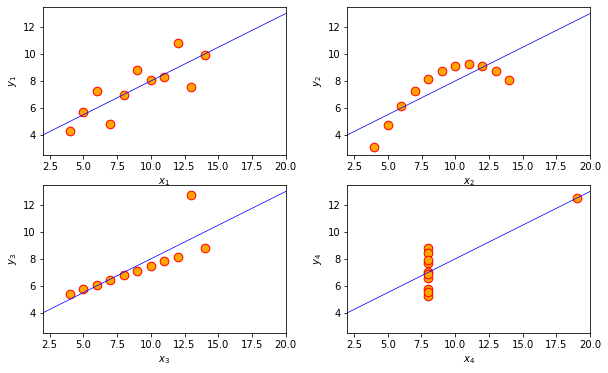

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,6))

axes[0,0].set_xlabel('$x_1$')
axes[0,0].set_ylabel('$y_1$')
axes[0,1].set_xlabel('$x_2$')
axes[0,1].set_ylabel('$y_2$')
axes[1,1].set_xlabel('$x_4$')
axes[1,1].set_ylabel('$y_4$')
axes[1,0].set_xlabel('$x_3$')
axes[1,0].set_ylabel('$y_3$')

i = 0
for a in axes:
    for ax in a:
        X, Y, X_pred, Y_pred = regresionLineal(data, i)
        ax.scatter(X, Y,marker = 'o', c='orange', s=75, edgecolor='red')
        ax.plot(X_pred, Y_pred, color='blue', lw=0.75)
        ax.set_xlim(2,20)
        ax.set_aspect(aspect=1.0)
        i += 2




In [10]:
indices=["Mean of x", "Sample variance of x", 
         "Mean of y", "Sample variance of y",
         "Correlation between x and y",
         "Linear Regresion Line",
         "Coefficiente of determination of linear regresion"
        ]
resumen = pd.DataFrame(np.zeros((7, 4)),index=indices)
resumen.columns=["Dataset 1","Dataset 2","Dataset 3","Dataset 4",]
#Medias de X
x_mean=[]
x_var=[]
for i in range(0,7,2):
    x_mean.append(data.iloc[:,i].mean())
    x_var.append(data.iloc[:,i].var())

resumen.iloc[0,:]=x_mean
resumen.iloc[1,:]=x_var


In [11]:
#Medias de Y
y_mean=[]
y_var=[]
for i in range(1,8,2):
    y_mean.append("{:.2f}".format(data.iloc[:,i].mean()))
    y_var.append("{:.3f}".format(data.iloc[:,i].var()))
    
resumen.iloc[2,:]=y_mean
resumen.iloc[3,:]=y_var

In [12]:
#C orrelacion entre X y Y
cor=data.corr()
cor_x_y=[]
for i in range(0,7,2):
    cor_x_y.append("{:.3f}".format(cor.iloc[i,i+1]))

resumen.iloc[4,:]=cor_x_y

In [13]:
#Lineas de regresion y scores
resumen.iloc[5,:]=lineas_regresion
resumen.iloc[6,:]=scores
resumen

,Dataset 1,Dataset 2,Dataset 3,Dataset 4
Mean of x,9,9,9,9
Sample variance of x,11,11,11,11
Mean of y,7.50,7.50,7.50,7.50
Sample variance of y,4.127,4.128,4.123,4.123
Correlation between x and y,0.816,0.816,0.816,0.817
Linear Regresion Line,3.00 + 0.500x,3.00 + 0.500x,3.00 + 0.500x,3.00 + 0.500x
Coefficiente of determination of linear regresion,0.67,0.67,0.67,0.67


Con este ejemplo, el articulo deja ver como los valores atipicos pueden hacer parecer que varios conjuntos de datos  presentan los mismos valores estadisticos, como la varinaza, media, etc. Lo que uno podria llegar a pensar es que para evitar este error, seria facil borrar los valores atipicos, ¿Pero y si esos valores atipicos reflejan algun comportamiento importante de los datos? Lo que aporta valor en nuestro conjunto de datos es la variablidad, ya que no sirve tener un gran volumen de datos si todos son los mismos. La manera de solucionar esto es estandarizar los datos para que asi no predomine un valor atipico a los demas datos.